In [41]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
import numpy as np

## Importing Data 

In [32]:
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# make a DataFrame 
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [33]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [34]:
print(df.isnull().sum()) # clean data

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


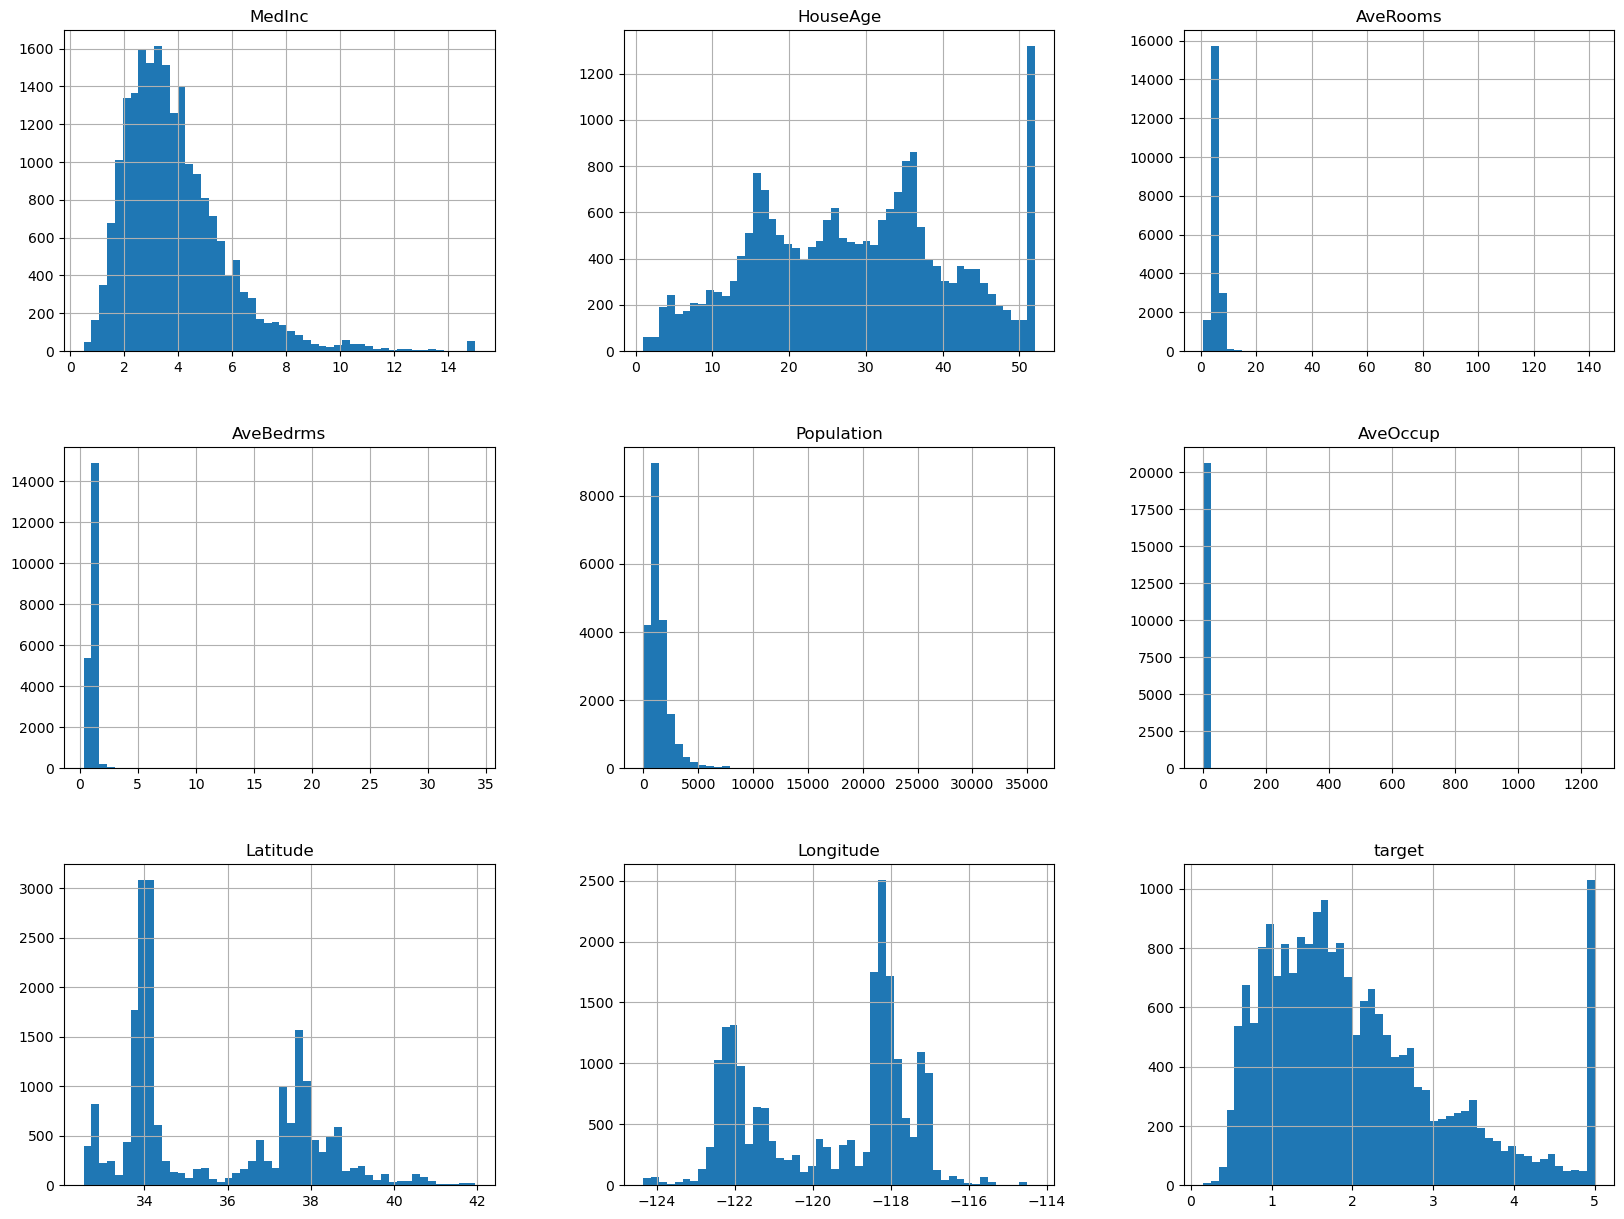

In [36]:
# Visualize feature distributions
df.hist(bins=50, figsize=(20, 15))
plt.show()

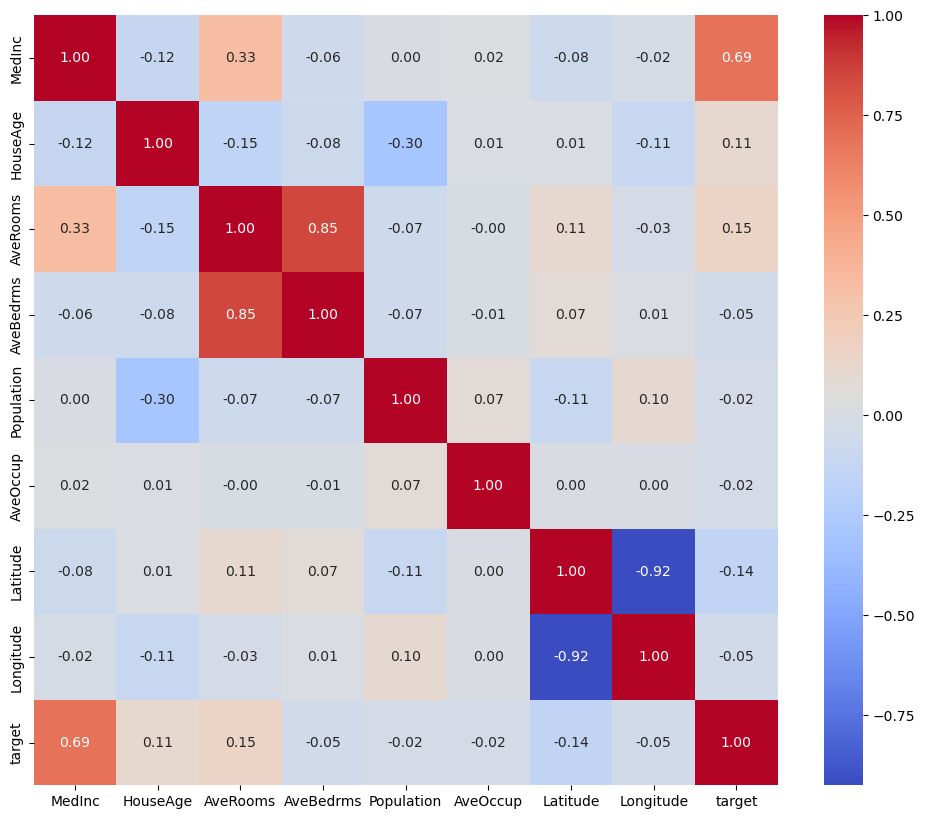

In [37]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Data Transformation

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Statistical Tests

In [42]:
# It's F-test
f_values, p_values = f_regression(X, y)
feature_scores = pd.DataFrame({'Feature': feature_names, 'F-Value': f_values, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Value', ascending=False))

      Feature       F-Value        P-Value
0      MedInc  18556.571631   0.000000e+00
2    AveRooms    487.757462  7.569242e-107
6    Latitude    438.005453   2.939859e-96
1    HouseAge    232.841479   2.761861e-52
3   AveBedrms     45.108576   1.912589e-11
7   Longitude     43.698976   3.923322e-11
4  Population     12.547410   3.976308e-04
5    AveOccup     11.635342   6.483442e-04


## Modeling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

## Train and evaluate model

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

Linear Regression MSE: 0.5558915986952442
SVR MSE: 0.3551984619989429
Random Forest MSE: 0.2543456241478694
Decision Tree MSE: 0.5051638738026648
Gradient Boosting MSE: 0.2940804571354899


## Artificial Neural Network (ANN)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# Define model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')


E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train and evaluate Model 

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

loss = ann_model.evaluate(X_test, y_test)
print(f'ANN MSE: {loss}')

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.7327 - val_loss: 0.4849
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4340 - val_loss: 0.4112
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3767 - val_loss: 0.3966
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3561 - val_loss: 0.3831
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3300 - val_loss: 0.3751
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3274 - val_loss: 0.3559
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4140 - val_loss: 0.3505
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3168 - val_loss: 0.3368
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3092 - val_loss: 0.3255
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2978 - val_loss: 0.3197
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2888 - val_loss: 0.3325
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2187 - val_loss: 0.2783
Epoch 69/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2279 - val_loss: 0.2779
Epoch 70/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2268 - val_loss: 0.2826
Epoch 71/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2264 - val_loss: 0.2834
Epoch 72/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2188 - val_loss: 0.2774
Epoch 73/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2271 - val_loss: 0.2796
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2629
ANN MSE: 0.27343228459358215


## Plot error curve

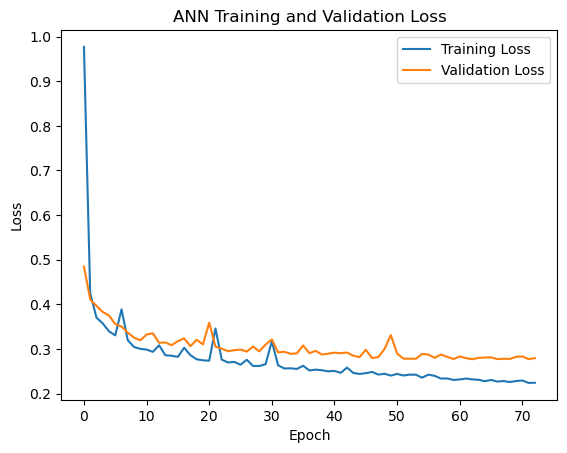

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model with 1D Convolutional Layers

In [50]:
from tensorflow.keras.layers import Conv1D, Flatten

### Reshape data for 1D CNN

In [51]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### CNN model

In [53]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

## Train and evaluate Model 

In [54]:
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

loss_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN MSE: {loss_cnn}')

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.4784 - val_loss: 0.5107
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4857 - val_loss: 0.4229
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4069 - val_loss: 0.4021
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3498 - val_loss: 0.4120
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3563 - val_loss: 0.3552
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3362 - val_loss: 0.4122
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3380 - val_loss: 0.3629
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3822 - val_loss: 0.3399
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3056 - val_loss: 0.3537
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3230 - val_loss: 0.3791
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4339
CNN MSE: 0.4362310767173767


## Plot Error Curves

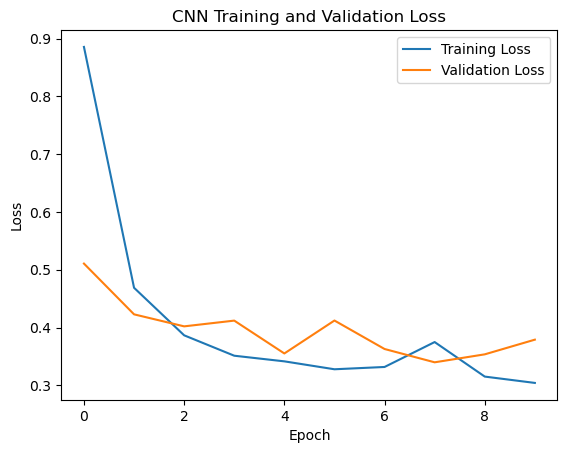

In [55]:
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()